In [9]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualizations

# Upload and Load The Data set

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (1).csv


In [11]:
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")

#CHECK THE INITIAL DATA

In [15]:
# Show first 5 rows
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n


# Clean and Prepare the Data



In [17]:
# Check for missing values
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [12]:
# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [13]:
print(df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [14]:
# Convert date columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])


In [18]:
#Check Data type again
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object


In [19]:
# Detect and remove outliers in 'sales' column
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

# ANALYZE THE DATA

In [20]:
#Total sales by Category
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Category:")
print(sales_by_category)


Total Sales by Category:
category
Office Supplies    343425.0040
Furniture          247877.6984
Technology         228415.3530
Name: sales, dtype: float64


In [21]:
#Total Profit by Category
profit_by_category = df.groupby('category')['profit'].sum().sort_values(ascending=False)
print("\nTotal Profit by Category:")
print(profit_by_category)


Total Profit by Category:
category
Office Supplies    66179.5379
Technology         35385.4240
Furniture          -2714.5353
Name: profit, dtype: float64


In [27]:
top_subcategories = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Sub-Categories by Sales:")
print(top_subcategories)


Top 5 Sub-Categories by Sales:
sub-category
Phones         117585.538
Storage         94705.956
Accessories     93024.684
Chairs          92925.467
Paper           75857.956
Name: sales, dtype: float64


#VISUALIZE THE DATA

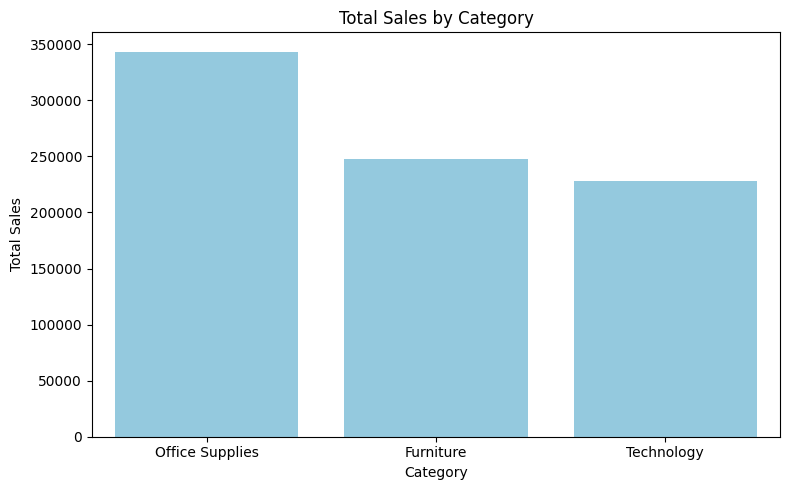

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, color='skyblue', errorbar=None)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

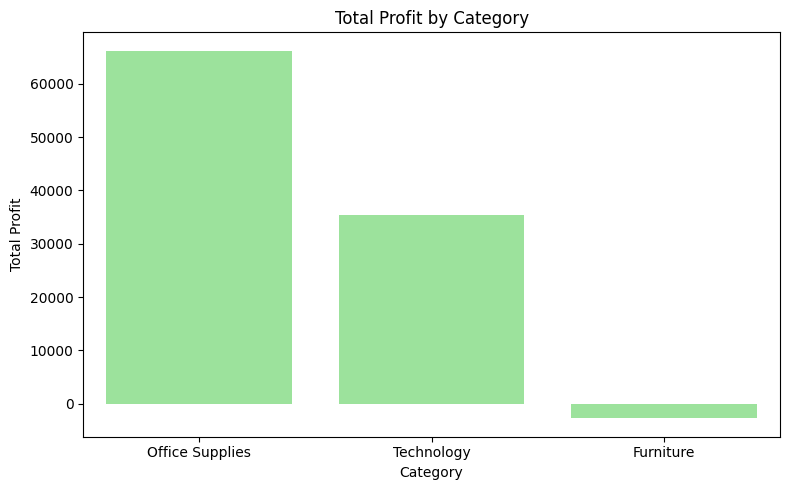

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, color='lightgreen', errorbar=None)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

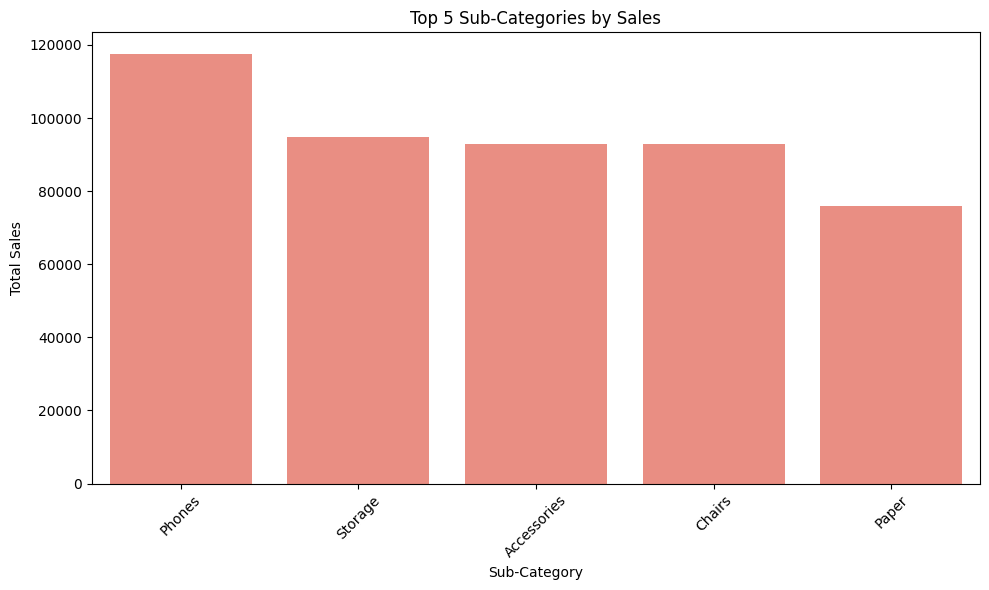

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcategories.index, y=top_subcategories.values, color='salmon', errorbar=None)
plt.title('Top 5 Sub-Categories by Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

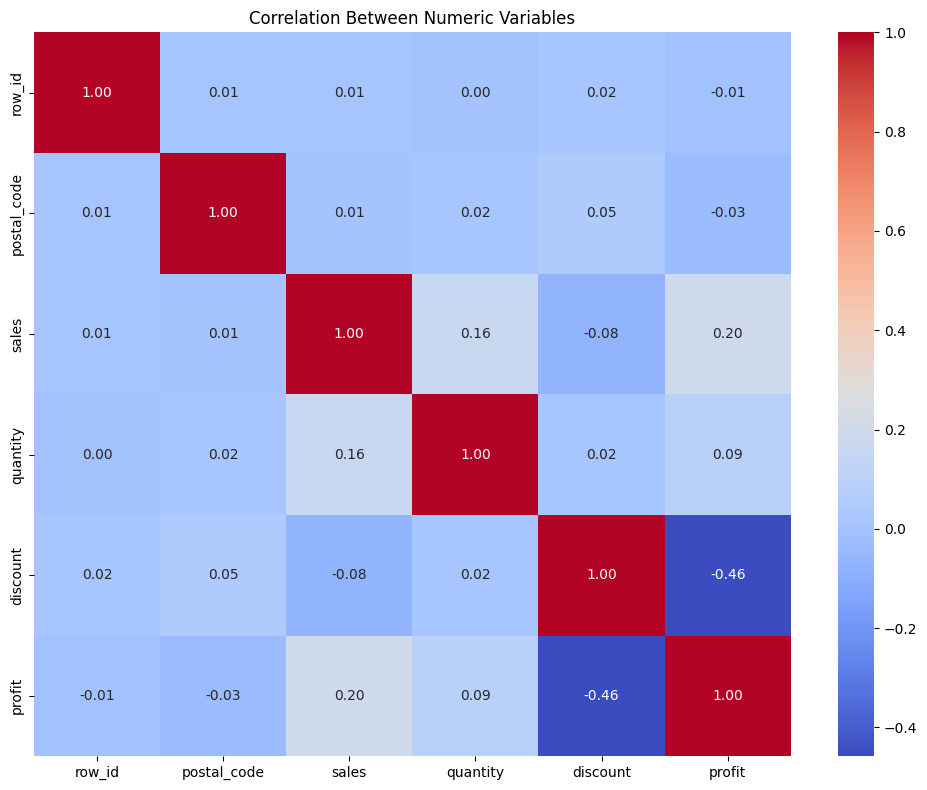

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Variables')
plt.tight_layout()
plt.show()